In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sqlite3  # imports the SQLite library
conn = sqlite3.connect("sales_data.db")  # connects (or creates) the database


In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("SELECT * FROM sales;")
rows = cursor.fetchall()
for row in rows:
    print(row)


(1, '2025-10-01', 'Laptop', 3, 750.0)
(2, '2025-10-02', 'Smartphone', 5, 500.0)
(3, '2025-10-03', 'Headphones', 10, 80.0)
(4, '2025-10-04', 'Monitor', 2, 200.0)
(5, '2025-10-05', 'Keyboard', 7, 45.0)


In [5]:
conn.close()

In [8]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("sales_data.db")

# Define your SQL query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Use pandas to execute the query and fetch the result as a DataFrame
df = pd.read_sql_query(query, conn)

# Display the result
print(df)

# Close the connection



      product  total_qty  revenue
0  Headphones         10    800.0
1    Keyboard          7    315.0
2      Laptop          3   2250.0
3     Monitor          2    400.0
4  Smartphone          5   2500.0


In [9]:
df = pd.read_sql_query(query, conn)

In [10]:
print(df.head(5)) # SHOW TOP 5 ROWS
print(df.info)   # DATA TYPES AND NON-NULL COUNTS
print(df.describe) # SUMMARY OF STATES

      product  total_qty  revenue
0  Headphones         10    800.0
1    Keyboard          7    315.0
2      Laptop          3   2250.0
3     Monitor          2    400.0
4  Smartphone          5   2500.0
<bound method DataFrame.info of       product  total_qty  revenue
0  Headphones         10    800.0
1    Keyboard          7    315.0
2      Laptop          3   2250.0
3     Monitor          2    400.0
4  Smartphone          5   2500.0>
<bound method NDFrame.describe of       product  total_qty  revenue
0  Headphones         10    800.0
1    Keyboard          7    315.0
2      Laptop          3   2250.0
3     Monitor          2    400.0
4  Smartphone          5   2500.0>


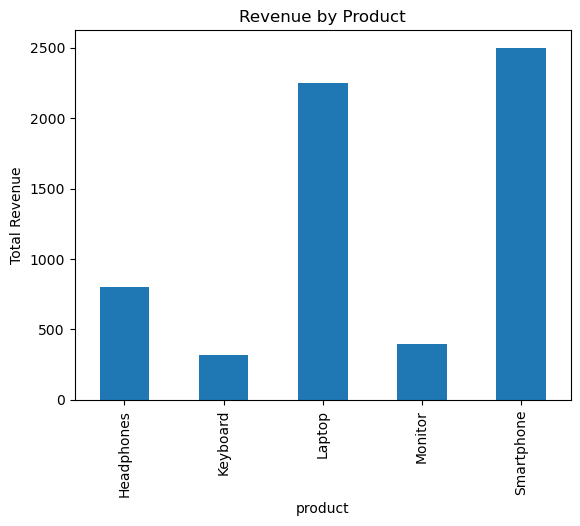

<Figure size 640x480 with 0 Axes>

In [13]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Total Revenue")
plt.show()

plt.savefig("sales_chart.png")
